In [6]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from scipy.stats import randint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [3]:
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

all_images = []
all_targets = []

# Loop through dataset adding images and labels intro numpy arrays
for target in os.listdir("dataset"):
    for image_filename in os.listdir("dataset/"+target):
        temp_image = Image.open("dataset/"+target+"/"+image_filename)
        # Decision Tree needs a 2d input, a flattened image is required
        image = np.array(temp_image.resize((256, 256))).flatten()
        all_images.append(image)
        all_targets.append(class_names.index(target))
        print(image.shape)

print(len(all_images))
print(len(all_targets))

(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)
(196608,)


In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(all_images, all_targets, random_state=123, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3373, 196608)
(844, 196608)
(3373,)
(844,)


In [7]:
# All parameters to be changed and tested
param_dist = {'max_depth': randint(1,20)}

# define model
model = DecisionTreeClassifier(random_state=123)

model_optimizer = RandomizedSearchCV(model, param_distributions = param_dist, n_iter=10, n_jobs=-1, random_state=123, return_train_score=True)

# Pass in dataset and fit to model
model_optimizer.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=123),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001ECAAEED870>},
                   random_state=123, return_train_score=True)

In [8]:
best_model = model_optimizer.best_estimator_
print('best hyper params:', model_optimizer.best_params_)
y_pred = best_model.predict(X_test)

best hyper params: {'max_depth': 7}


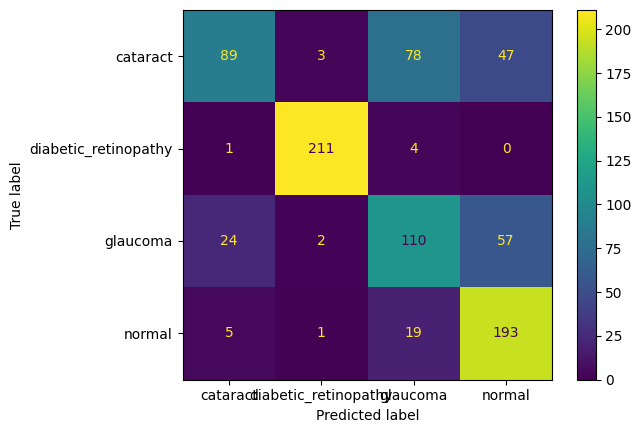

In [9]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot();

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Error:", 1-accuracy)
for i, target in enumerate(class_names):
    print(f'{target} Precision: {precision[i]}')
    print(f'{target} Recall: {recall[i]}')
    print(f'{target} F1_Score: {f1[i]}')

Accuracy: 0.7144549763033176
Error: 0.28554502369668244
cataract Precision: 0.7478991596638656
cataract Recall: 0.41013824884792627
cataract F1_Score: 0.5297619047619048
diabetic_retinopathy Precision: 0.9723502304147466
diabetic_retinopathy Recall: 0.9768518518518519
diabetic_retinopathy F1_Score: 0.97459584295612
glaucoma Precision: 0.5213270142180095
glaucoma Recall: 0.5699481865284974
glaucoma F1_Score: 0.5445544554455446
normal Precision: 0.6498316498316499
normal Recall: 0.8853211009174312
normal F1_Score: 0.7495145631067961
